In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
%matplotlib inline

data = pd.read_csv("automobile.txt")
headers = data.columns

for item in headers:
    print(item)
    print(data[item].unique())

print(headers)


symboling
[ 3  1  2  0 -1 -2]
normalized-losses
['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']
make
['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type
['gas' 'diesel']
aspiration
['std' 'turbo']
num-of-doors
['two' 'four' '?']
body-style
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels
['rwd' 'fwd' '4wd']
engine-location
['front' 'rear']
wheel-base
[ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112.  102.7  93.   96.3  95.1  97.

**Dataset Summary**
- Contains data on specific cars that could be useful to an insurance company
- Empty cells are indicated wih a question mark (?)
- Some columns have their numeric data as a string type (price, for example)
- Headers:
    - Symboling: Is a car is more risky than the price indicates, (-3 = safe, 3 = risky).
    - Normalised losses: The relative average loss payment per insured vehicle year, nomralised between car types.
    - Make: Car manufacturer
    - Fuel type: Petrol/Diesel
    - asperation: Type of air outlet in the engine (Standard/Turbo)
    - Number of doors
    - Body Style: Convertable/Hatchback etc
    - Drive wheels: front,back, or 4
    - Engine location: front/back
    - Wheel base
    - Length
    - Width
    - Height
    - Curb weight: weigth of car and full tank of fuel
    - Engine type
    - Number of cylinders
    - Engine size
    - Fuel system
    - Bore
    - Stroke
    - Compression ratio
    - Horsepower
    - Peak RPM
    - City miles per gallon
    - Highway miles per gallon
    - Price


# Dealing with empty cells

<AxesSubplot:>

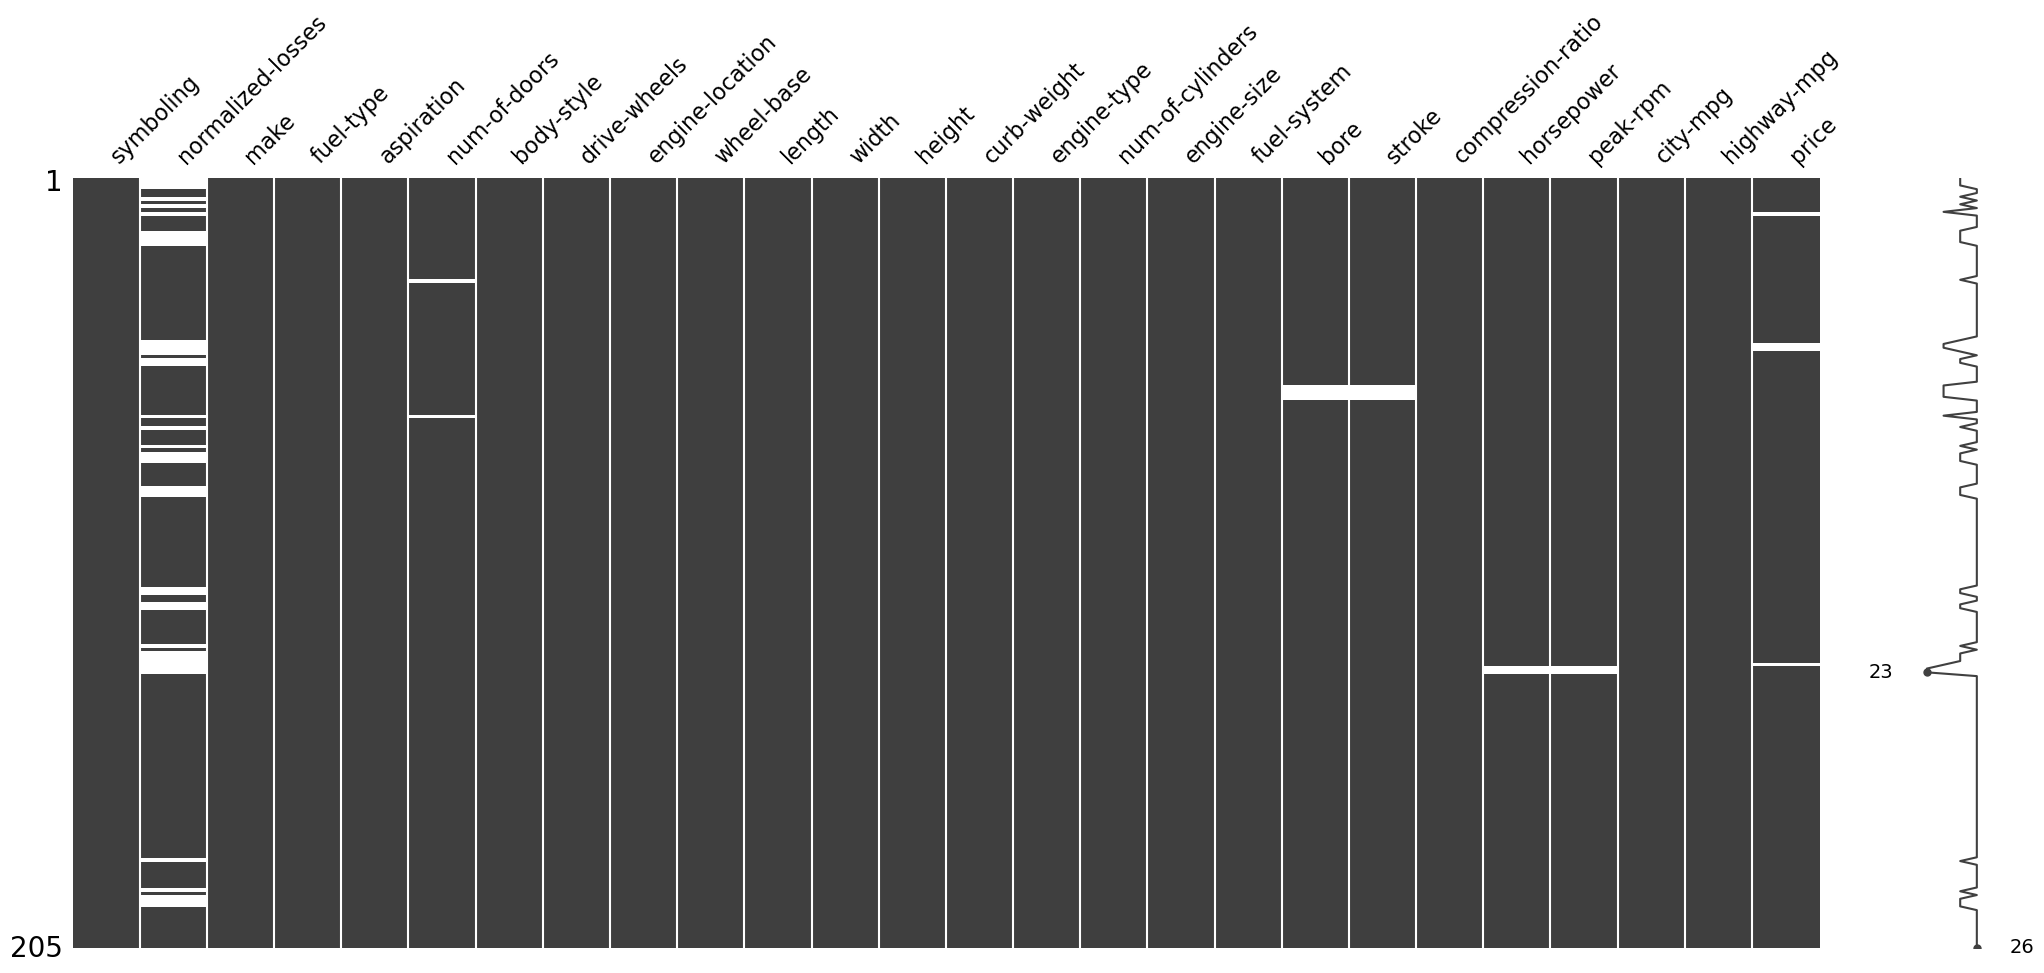

In [2]:
#Replace all empty cells shown with a question makr into an actual nll value
data.replace("?",np.NaN,inplace=True)

#Converts all valid data into into a numeric type, if it was a string
data = data.apply(pd.to_numeric,errors="ignore")

#Plots a matrix of all the empty cells
missingno.matrix(data)

In [3]:
#Remove the normalized losses column
dataClean = data.drop(columns="normalized-losses")

#Collecting the rows that contain empty cells 
emptyRows = dataClean.loc[dataClean.isna().any(axis=1)]
emptyAn = emptyRows[["make","num-of-doors","bore","stroke","horsepower","peak-rpm","price"]]
emptyAn

,make,num-of-doors,bore,stroke,horsepower,peak-rpm,price
9,audi,two,3.13,3.40,160.0,5500.0,NaN
27,dodge,NaN,3.03,3.39,102.0,5500.0,8558.0
44,isuzu,two,3.03,3.11,70.0,5400.0,NaN
45,isuzu,four,3.03,3.11,70.0,5400.0,NaN
55,mazda,two,NaN,NaN,101.0,6000.0,10945.0
56,mazda,two,NaN,NaN,101.0,6000.0,11845.0
57,mazda,two,NaN,NaN,101.0,6000.0,13645.0
58,mazda,two,NaN,NaN,135.0,6000.0,15645.0
63,mazda,NaN,3.39,3.39,64.0,4650.0,10795.0
129,porsche,two,3.94,3.11,288.0,5750.0,NaN


**Obervation**
- Cars that do not have a bore value will also not have a stroke value
- Cars with missing bore and stroke values all come from Mazda
- Cars that do not have a horsepower value will also not have a peak rpm value
- Cars with missing horsepower and rpm values comes from Renault

In [4]:
#Gets number of cars for each manufacturer
makeCount = dataClean["make"].value_counts()

#Gets number of rows with empty cells for each manufacturer
emptyCounts = emptyAn["make"].value_counts()
#Combines both series
percentage = pd.DataFrame({"Total": makeCount,"Empty":emptyCounts})

#Fills empty values with 0 because that is what they represent
percentage.fillna(0,inplace=True)

#Converting empty column into integers
percentage["Empty"] = percentage["Empty"].astype(np.int64)

#Calcualtes the percentage of each maker has got rows with empty values in
percentage["ratio"] = round(percentage["Empty"]/percentage["Total"]*100,2)
percentage.loc[percentage["ratio"] != 0].sort_values("Total",ascending=False)

,Total,Empty,ratio
mazda,17,5,29.41
dodge,9,1,11.11
audi,7,1,14.29
porsche,5,1,20.00
isuzu,4,2,50.00
renault,2,2,100.00


**Observation**
- Renault only has 2 entires in the dataset, and both of them have empty cells in the horsepower and peak rpm attributes. I will take this into account if I am comparing thoese values
- Half of Isuzu entries contain empty cells, these empty cells are in the price attributes.
- The other values that are empty seem to be randomly missing. There are also a small number of them so I don't think they will effect the main statistical outcomes.
- I will leave these values unless I am comparing something that will be effected by said values. 
- The normalized losses column has also been deleted because I will not ber using it in my analysis, and it contains a much larger number of empty cells compared to the other columns

# Data Exploration

Text(0, 0.5, '')

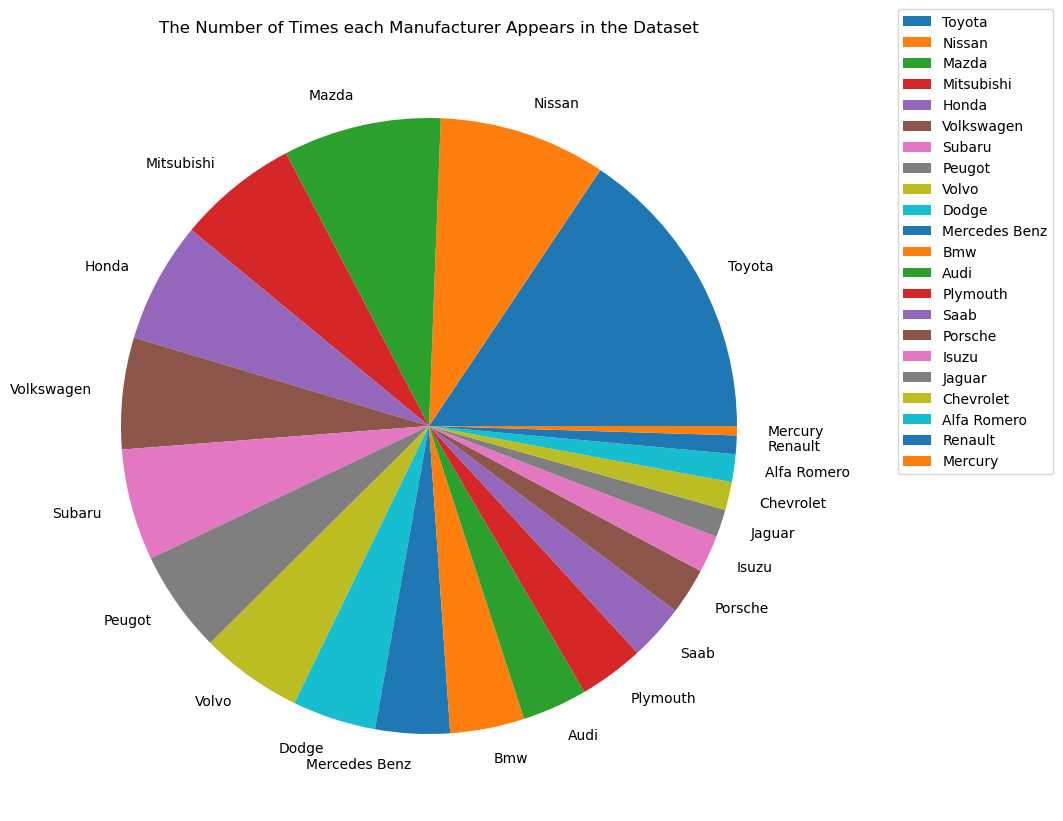

In [5]:
#Gets list of manufacturer names
makeNames = makeCount.index
#Empty list ot hold processes names
nameList = []
#Loops through each name in the list
for item in makeNames:
    #Converts the strings into noun with the correct formatting
    new = item.title().replace("-"," ")
    nameList.append(new)

#Sets the index of the dataset to these new strings
makeCount.index = nameList

#Plots a pie chart of the data
makeCount.plot.pie(figsize=(20,10))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.title("The Number of Times each Manufacturer Appears in the Dataset")
plt.ylabel("")

**Observations**
- Toyota has the most cars in this dataset, by a large amount
- Mercury has the least number of cars in the dataset

Index(['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen',
       'subaru', 'peugot', 'volvo', 'dodge', 'mercedes-benz', 'bmw', 'audi',
       'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet',
       'alfa-romero', 'renault', 'mercury'],
      dtype='object')
make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64


Text(0.5, 1.0, 'Average price of car by manufacturer')

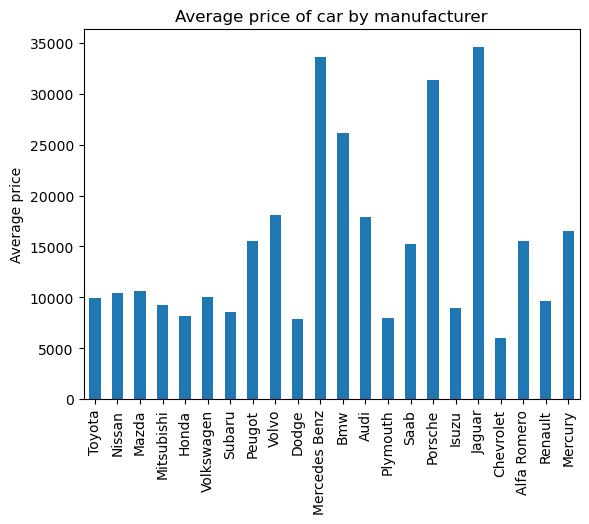

In [28]:
#Get subset of data to be looked at
price = dataClean[["make","price"]]

#Removes entires that have an empty value for the price
price = price.drop(axis=1,index=[9,44,45,129])

#Sorts the columns by price in decending order
price.sort_values("price",ascending=False)

#Groups by the manufacturer and calculates the means of all valid columns
makePrice = price.groupby("make").mean(numeric_only=True)

#Sorts columns by average price for each manufacturer
plotPrice = makePrice["price"].sort_values()

#Puts into the same order as the pie chart
plotPrice = plotPrice.reindex(makeNames)

#Makes the labels neat
plotPrice.index = nameList

#Plots price by manufacturer
plotPrice.plot.bar()
plt.xlabel("")
plt.ylabel("Average price")
plt.title("Average price of car by manufacturer")

**Observations**
- The price of cars seem to be in 3 levels
    - **Cheapest:** Chevrolet, Dodge, Plymouth, Honda, Subaru, Isuzu, Mitzubishi, Renault, Toyota, VW, Nissan, and Mazda
    - **Mid:** Saab, Pengot, Alfa Romero, Mercury, Audi, and Volvo
    - **Top:** BMW, Porsche, Mercedes Benz, and Jaguar

Text(0, 0.5, 'Horsepower')

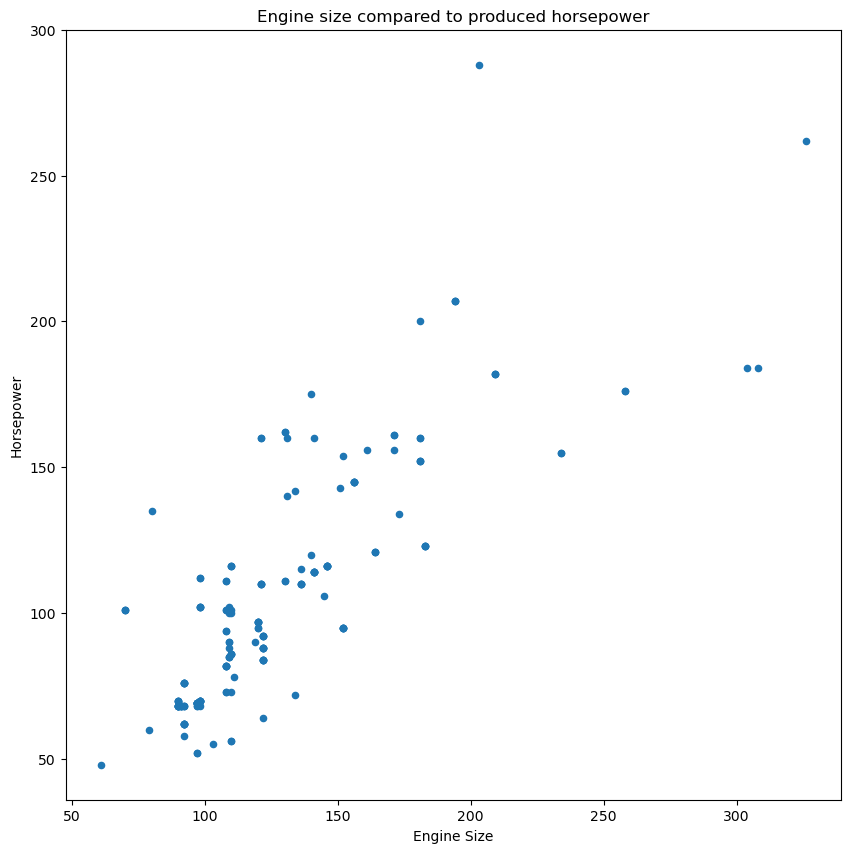

In [30]:
#Gets subset of data containing the engine size and the horsepower
engineHorse = dataClean[["engine-size","horsepower"]]
engineHorse.plot.scatter(x="engine-size",y="horsepower",figsize=(10,10))
plt.title("Engine size compared to produced horsepower")
plt.xlabel("Engine Size")
plt.ylabel("Horsepower")

**Observation**
- As the size of the engine increases, as does the horsepower, as expected

Text(0.5, 1.0, 'Engine size compared to fuel consumption')

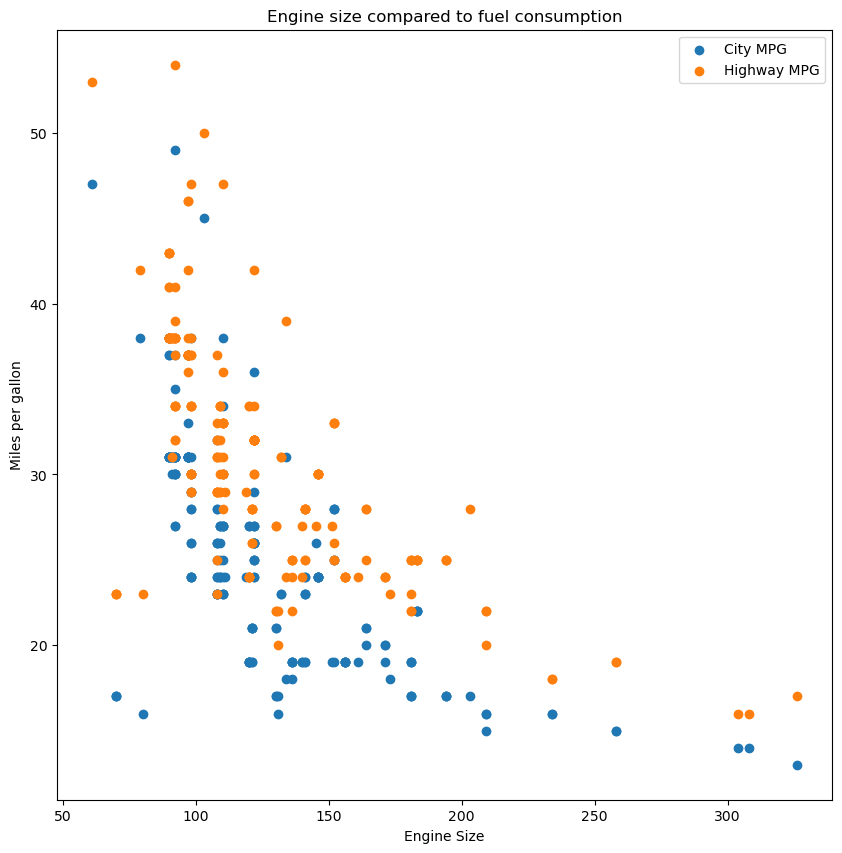

In [31]:
#Gets subset containing data on the engine size the the miles per gallon
engineMPG = dataClean[["engine-size","city-mpg","highway-mpg"]]

#Plots both sets of data
plt.figure(figsize=(10,10))
plt.scatter(engineMPG["engine-size"],engineMPG["city-mpg"],label="City MPG")
plt.scatter(engineMPG["engine-size"],engineMPG["highway-mpg"],label="Highway MPG")
plt.legend()
plt.xlabel("Engine Size")
plt.ylabel("Miles per gallon")
plt.title("Engine size compared to fuel consumption")


**Observation**
- Smaller engines will generally have a better miles per gallon compared to larger engines.
- Most engines are have a better miles per gallon while travelling on the highway.
- The trend is an exponential decay

Text(0.5, 1.0, 'Car weight compared to the fuel consumption')

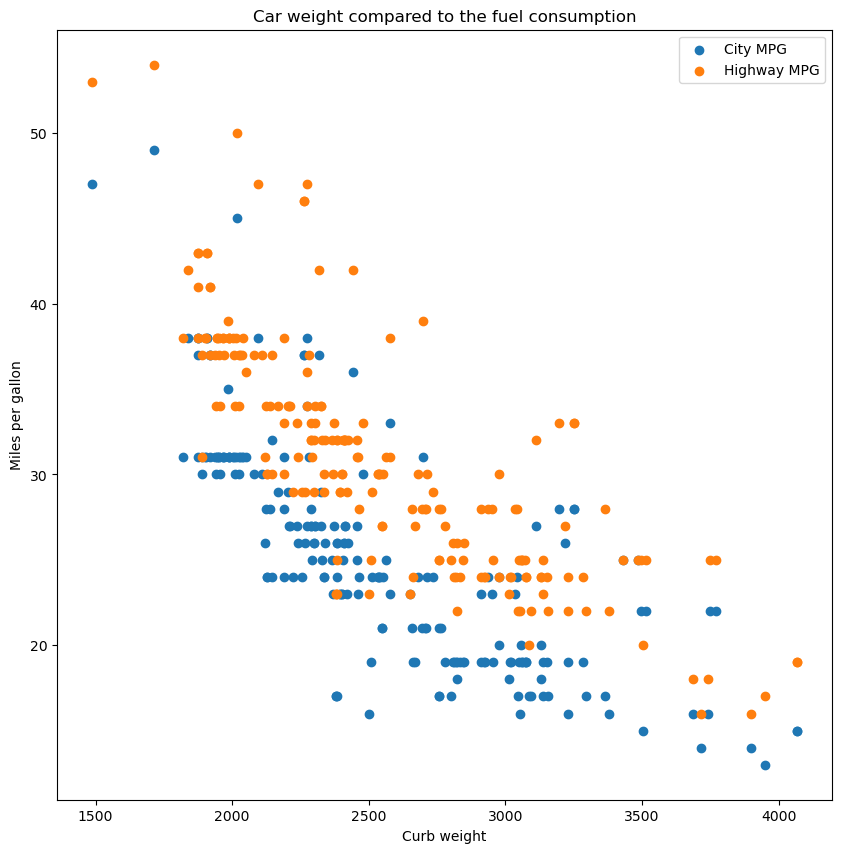

In [33]:
#Subset containing data on the weight of a vehicle and the miles per gallon
weightMPG = dataClean[["city-mpg","highway-mpg","curb-weight"]]

#Plots both sets of data
plt.figure(figsize=(10,10))
plt.scatter(weightMPG["curb-weight"],weightMPG["city-mpg"],label="City MPG")
plt.scatter(weightMPG["curb-weight"],weightMPG["highway-mpg"],label="Highway MPG")
plt.legend()
plt.xlabel("Curb weight")
plt.ylabel("Miles per gallon")
plt.title("Car weight compared to the fuel consumption")


**Observation**
- The lighter the car, the more miles per gallon
- The trend is shows that the decrease in miles per gallon is quite linear compared to the engine size

Text(0.5, 1.0, 'Fuel consumption or types of fuel')

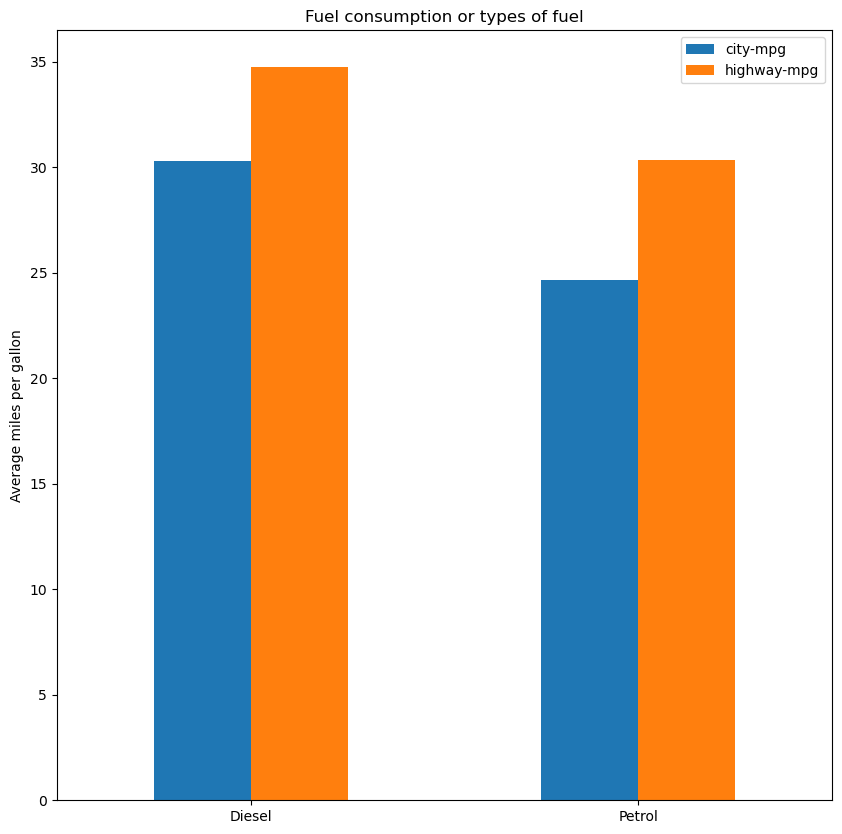

In [53]:
fuelMPG = dataClean[["fuel-type","city-mpg","highway-mpg"]]


fuelGroup = fuelMPG.groupby("fuel-type").mean()
fuelGroup.index = ["Diesel","Petrol"]

fuelGroup.plot.bar(figsize=(10,10))

plt.xticks(rotation="horizontal")

plt.xlabel("")
plt.ylabel("Average miles per gallon")
plt.title("Fuel consumption or types of fuel")

**Observation**
- Diesel gives a better miles per gallon for both being in a city and on the highway.
- Miles per gallon for a petrol car on the highway is the same as a diesel car in the city.

Text(0.5, 1.0, 'Produced horsepower compared to price')

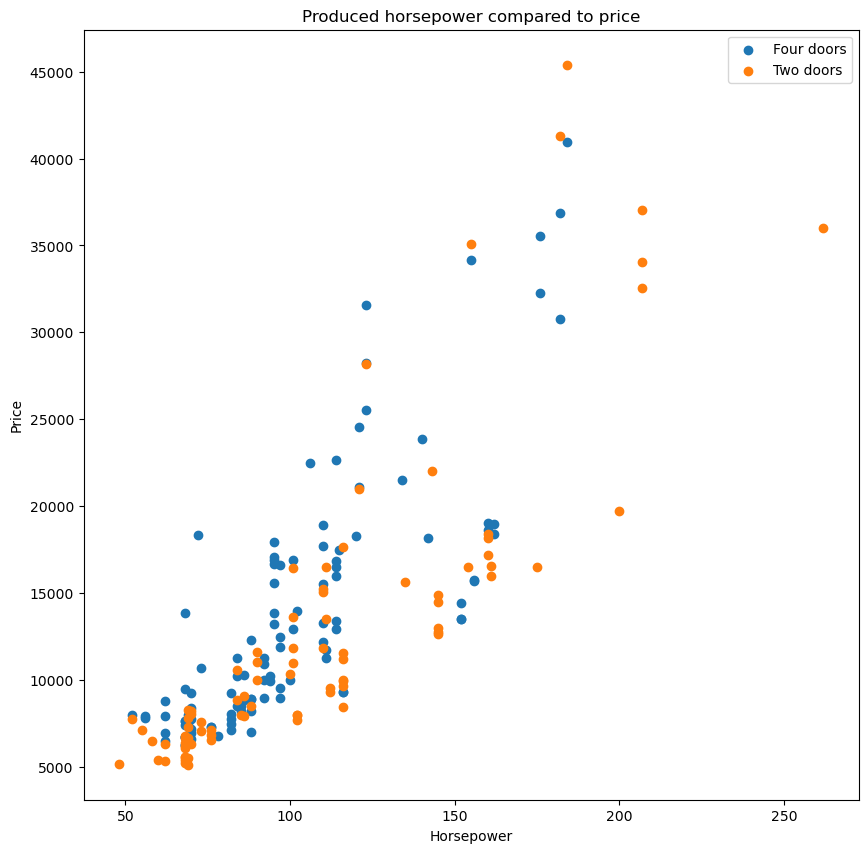

In [55]:
#Gets subset containing door, horsepower and price data
doors = dataClean[["num-of-doors","horsepower","price"]]

#Gets all entries that contain 4 doors
four = doors.loc[doors["num-of-doors"]=="four"]

#Gets all entries that contain 2 doors
two = doors.loc[doors["num-of-doors"]=="two"]

#Plots each series
plt.figure(figsize=(10,10))
plt.scatter(four["horsepower"],four["price"],label="Four doors")
plt.scatter(two["horsepower"],two["price"],label="Two doors")
plt.legend()

plt.xlabel("Horsepower")
plt.ylabel("Price")
plt.title("Produced horsepower compared to price")

**Observation**
- The price of the car increases as the horsepower increases
- Cars with 4 doors are generally more expensive
- The cars with the most horsepower are 2 door
- The most expensive cars are also 2 door

Text(0, 0.5, 'Peak RPM')

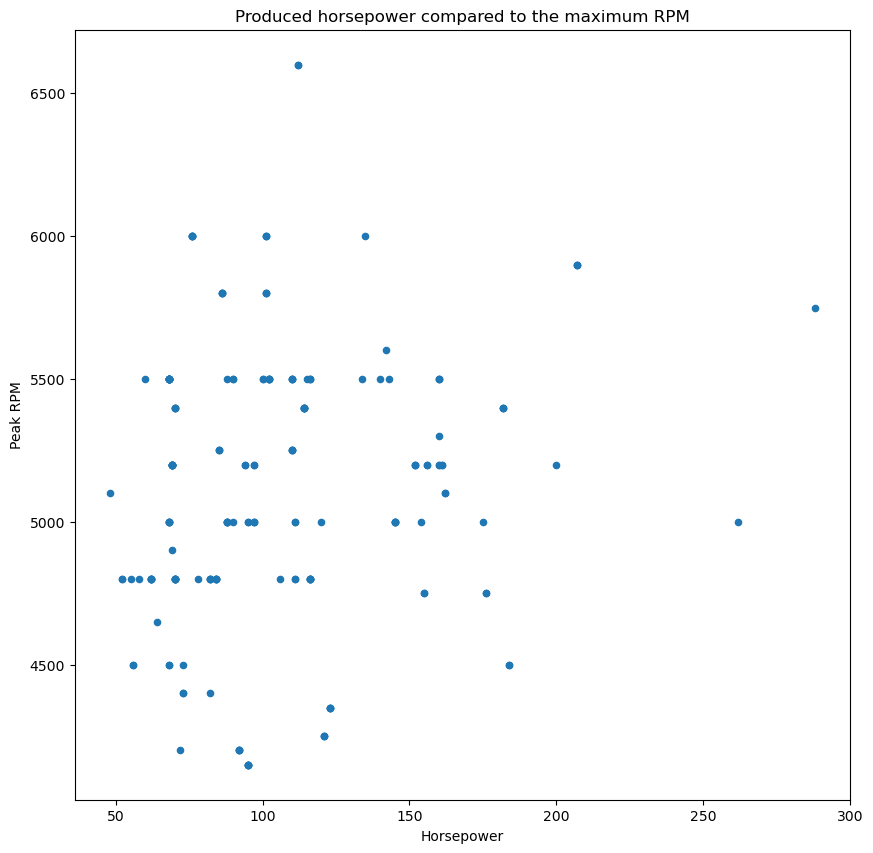

In [57]:
#Gets subset containing data on a cars horsepower and peak RPM
horseRPM = dataClean[["horsepower","peak-rpm"]]

#Plots scatter plot
horseRPM.plot.scatter(x="horsepower",y="peak-rpm",figsize=(10,10))
plt.title("Produced horsepower compared to the maximum RPM")
plt.xlabel("Horsepower")
plt.ylabel("Peak RPM")

**Observation**
- There seems to be little connection between a cars horsepower and max RPM. 